# 패키지 import

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기

In [34]:
path = './data/'
train = pd.read_csv(path+'train.csv')
test = pd.read_csv(path+'test.csv')

In [35]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


# 데이터 살펴보기

## 컬럼 정보

- Survived: 생존 여부 / 0 = 사망, 1 = 생존
- Pclass: 티켓 등급 / 1 = 1등급, 2 = 2등급, 3 = 3등급
- Name: 이름 / (last name, Title, first name, middle name) 형식으로 구성
- Sex: 성별
- Age: 나이 / 1살 미만의 경우 분수, 추정 나이면 xx.5
- SibSp: 형제자매, 배우자 수
- Parch: 부모, 자녀 수
- Ticket: 티켓 번호
- Fare: 운임
- Cabin: 객실 번호
- Embarked: 탑승 선착장 / C = Cherbourg, Q = Queenstown, S = Southampton

In [36]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [37]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


train의 Age, Cabin, Embarked와 test의 Age, Fare, Cabin에 결측치가 있다.

In [39]:
train.info()
print("-"*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [40]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# EDA
각 column과 생존률의 관계를 살펴보자.

## Pclass

티켓 등급별 생존률

In [41]:
pd.pivot_table(data=train, values='Survived', index='Pclass', aggfunc=['mean', 'sum', 'count'])

,mean,sum,count
,Survived,Survived,Survived
Pclass,,,
1,0.629630,136,216
2,0.472826,87,184
3,0.242363,119,491


티켓 등급과 셩별 별 생존 비율

In [42]:
pd.pivot_table(data=train, values='Survived', index=['Pclass', 'Sex'], aggfunc=['mean', 'sum', 'count'])

mean      sum    count
               Survived Survived Survived
Pclass Sex                               
1      female  0.968085       91       94
       male    0.368852       45      122
2      female  0.921053       70       76
       male    0.157407       17      108
3      female  0.500000       72      144
       male    0.135447       47      347

티켓 등급별 평균 연령(결측치 미포함)

In [43]:
# train.groupby('Pclass')[['Age']].mean()
pd.pivot_table(data=train, values='Age', index='Pclass', aggfunc=['mean', 'count'])

,mean,count
,Age,Age
Pclass,,
1,38.233441,186
2,29.877630,173
3,25.140620,355


티켓 등급별 평균 운임

In [44]:
train.groupby('Pclass')[['Fare']].mean()

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


## Name

Name에서 Title(호칭)을 분리해 Title column으로 만들어줬다.

In [45]:
train['Title'] = train['Name'].map(lambda x: x.split(', ')[1].split('. ')[0])
train['Title']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

Title(호칭)별 생존률

In [46]:
pd.pivot_table(data=train, values='Survived', index='Title', aggfunc=['mean', 'sum', 'count']).sort_values(('count', 'Survived'), ascending=False)

,mean,sum,count
,Survived,Survived,Survived
Title,,,
Mr,0.156673,81,517
Miss,0.697802,127,182
Mrs,0.792000,99,125
Master,0.575000,23,40
Dr,0.428571,3,7
Rev,0.000000,0,6
Major,0.500000,1,2
Col,0.500000,1,2


2명 이하가 가진 호칭들은 Rare라는 이름으로 통일해줬다.

In [47]:
under_2_titles = train.Title.value_counts()[train.Title.value_counts()<=2].index

In [48]:
train['Title'] = train['Title'].replace(under_2_titles, 'Rare')
train['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Rare       14
Dr          7
Rev         6
Name: Title, dtype: int64

타이타닉에서의 Master는 어린 남자 아이를 가리키는 호칭으로 사용 되었다고 한다.

평균 나이 4.57세

In [49]:
train[train.Title == 'Master']['Age'].mean()

4.574166666666667

Master 호칭의 성별과 나이별 생존률

In [50]:
pd.pivot_table(data=train[train.Title == 'Master'], values='Survived', index=['Sex', 'Age'], aggfunc=['mean', 'sum', 'count'])

mean      sum    count
           Survived Survived Survived
Sex  Age                             
male 0.42      1.00        1        1
     0.67      1.00        1        1
     0.83      1.00        2        2
     0.92      1.00        1        1
     1.00      0.60        3        5
     2.00      0.25        1        4
     3.00      1.00        4        4
     4.00      0.40        2        5
     6.00      1.00        1        1
     7.00      0.00        0        2
     8.00      0.50        1        2
     9.00      0.50        2        4
     10.00     0.00        0        1
     11.00     0.50        1        2
     12.00     1.00        1        1

호칭별 평균 나이

In [51]:
pd.pivot_table(data=train, values='Age', index=['Title'], aggfunc=['mean'])

,mean
,Age
Title,
Dr,42.000000
Master,4.574167
Miss,21.773973
Mr,32.368090
Mrs,35.898148
Rare,42.214286
Rev,43.166667


## Sex

남녀 생존률 비교

In [52]:
pd.pivot_table(data=train, values='Survived', index='Sex', aggfunc=['mean', 'sum', 'count'])

,mean,sum,count
,Survived,Survived,Survived
Sex,,,
female,0.742038,233,314
male,0.188908,109,577


남녀 평균 나이(나이 결측치 미반영)

In [53]:
train.groupby('Sex')[['Age']].mean()

,Age
Sex,
female,27.915709
male,30.726645


남녀 운임 비교

여자의 평균 운임이 확연이 더 높은 것을 알 수 있다. 왜그럴까?

In [55]:
train.groupby('Sex')[['Fare']].mean()

,Fare
Sex,
female,44.479818
male,25.523893


티켓 등급이 평균적으로 높아서 그런것일까 하고 티켓 등급별로 비교해봤다.

그러나 같은 티켓 안에서도 운임이 차이나는 것을 확인할 수 있다..

In [56]:
pd.pivot_table(data=train, values='Fare', index=['Pclass', 'Sex'], aggfunc=['mean', 'count'])

mean count
                     Fare  Fare
Pclass Sex                     
1      female  106.125798    94
       male     67.226127   122
2      female   21.970121    76
       male     19.741782   108
3      female   16.118810   144
       male     12.661633   347

그러다 문득 Cabin(객실)을 예약하지 않고 배만 탈 수도 있지 않을까..? 하는 생각이 떠올라서 객실이 있는 사람과 없는사람의 요금을 비교해보았다..!!

In [57]:
print(f"객실이 NaN인 사람의 요금: {train.Fare[train.Cabin.isna()].mean()}")
print(f"객실이 있는 사람의 요금: {train.Fare[~train.Cabin.isna()].mean()}")

객실이 NaN인 사람의 요금: 19.157325327510915
객실이 있는 사람의 요금: 76.14150392156863


요금의 차이가 확연히 나는 것을 확인할 수 있었다!

그래서 Cabin이 NaN값인 사람들이 데이터가 기록되지 않은 것이 아닌 앉아서 가는 좌석만을 예매한 것이 아닐까? 라는 가설을 세워봤다.

그러나 자료를 조사해본 결과 타이타닉 호는 영국-미국의 장기 항해 배였고 빙산에 충돌하기 전까지 약 4일 이상을 항해했던 것으로 보아 승객의 객실 배정은 필수 요소였던 것으로 보인다.

결과적으로 객실이 NaN인 사람들도 모두 객실을 배정 받았으며 객실 값이 있는 사람들이 대표로 방을 여러 개 예약해서 운임이 더 비쌌던 것으로 보인다.

본론으로 돌아와, 여성의 운임이 남성의 운임보다 비싼 이유는 여자가 남자보다 객실을 더 많이 예약한 것이 아닐까? 라는 가설 검증하기 위해 객실 예매 여부와 성별 비율을 알아봤다.

In [203]:
(~train.Cabin.isna()).mean()

0.22895622895622897

In [225]:
train[~train.Cabin.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family,Floor,AgeRange
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,C,30.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,C,30.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,0,E,50.0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Miss,2,G,0.0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,Miss,0,C,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,Mrs,2,D,40.0
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,Mr,0,B,30.0
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,Mrs,1,C,50.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,0,B,10.0


## Age
결측치 177개 존재

In [58]:
train.Age.isna().sum()

177

나이대별 생존률 확인하기

나이대를 나타내는 "AgeRange" column 생성

In [158]:
AgeRange = train.Age//10*10 # 십의자리 내림 꼼수
AgeRange.value_counts().sort_index()

0.0      62
10.0    102
20.0    220
30.0    167
40.0     89
50.0     48
60.0     19
70.0      6
80.0      1
Name: Age, dtype: int64

60대 이상은 표본이 너무 작기 때문에 60으로 합침

In [159]:
AgeRange[AgeRange >= 60.0] = 60.0
AgeRange.value_counts().sort_index()

0.0      62
10.0    102
20.0    220
30.0    167
40.0     89
50.0     48
60.0     26
Name: Age, dtype: int64

df에 AgeRange column 추가

In [160]:
train['AgeRange'] = AgeRange
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family,Floor,AgeRange
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,NaN,20.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,C,30.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,NaN,20.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,C,30.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,NaN,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev,0,NaN,20.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,0,B,10.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,3,NaN,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,0,C,20.0


나이대별 생존률

<Axes: xlabel='AgeRange'>

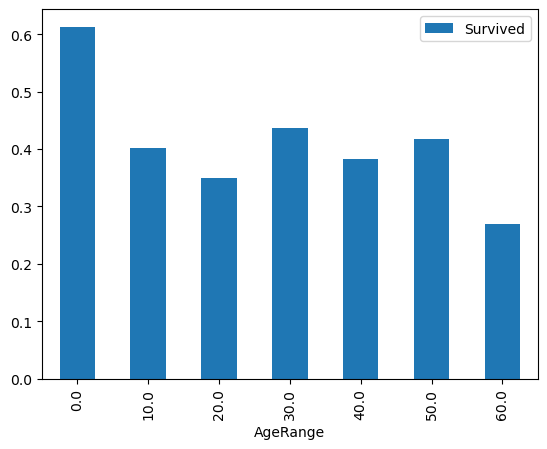

In [269]:
train.groupby('AgeRange')[['Survived']].mean().plot(kind='bar')

나이 정보가 있는 사람들의 평균 생존률은 약 40%이다.

In [171]:
train.groupby('AgeRange')['Survived'].mean().mean()

0.4099870952043884

아래는 전체 생존률과 연령대별 생존률의 차이 수치이다.

10대 미만의 생존률이 평균보다 약 20% 높고, 60대 이상의 생존률이 평균보다 약 14% 떨어지는 것을 확인할 수 있다.

In [183]:
(train.groupby('AgeRange')[['Survived']].mean())-(train.groupby('AgeRange')['Survived'].mean().mean())

,Survived
AgeRange,
0.0,0.202916
10.0,-0.008026
20.0,-0.059987
30.0,0.027139
40.0,-0.027965
50.0,0.006680
60.0,-0.140756


## SibSp

형제자매와 배우자 수에 따른 생존률

In [60]:
pd.pivot_table(data=train, values='Survived', index='SibSp', aggfunc=['mean', 'sum', 'count'])

,mean,sum,count
,Survived,Survived,Survived
SibSp,,,
0,0.345395,210,608
1,0.535885,112,209
2,0.464286,13,28
3,0.250000,4,16
4,0.166667,3,18
5,0.000000,0,5
8,0.000000,0,7


## Parch

부모와 자식의 수에 따른 생존률

In [61]:
pd.pivot_table(data=train, values='Survived', index='Parch', aggfunc=['mean', 'sum', 'count'])

,mean,sum,count
,Survived,Survived,Survived
Parch,,,
0,0.343658,233,678
1,0.550847,65,118
2,0.500000,40,80
3,0.600000,3,5
4,0.000000,0,4
5,0.200000,1,5
6,0.000000,0,1


## SibSp + Parch = Family!
SibSp(형제자매, 배우자)와 Parch(부모, 자식)을 합쳐 Family column을 추가했다.

In [62]:
train['Family'] = train['SibSp'] + train['Parch']
train['Family'].value_counts()

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Family, Length: 891, dtype: int64

가족 수에 따른 생존률

In [231]:
pd.pivot_table(data=train, values='Survived', index='Family', aggfunc=['mean', 'sum', 'count'])

,mean,sum,count
,Survived,Survived,Survived
Family,,,
0,0.303538,163,537
1,0.552795,89,161
2,0.578431,59,102
3,0.724138,21,29
4,0.200000,3,15
5,0.136364,3,22
6,0.333333,4,12
7,0.000000,0,6


## Ticket

중복되는 티켓들이 몇 가지 있다.

티켓 정보는 의미를 찾기 어려웠다.

In [64]:
train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

중복되는 티켓의 개수

In [65]:
(train['Ticket'].value_counts()>1).sum()

134

## Fare

평균 운임은 32.2에 최소 운임은 0, 최대 운임은 512였다.

In [66]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

운임이 0인 데이터를 확인해보자.

티켓 등급은 각각 다르고, 전원 남자에 같이 탑승한 가족들은 없었고 전부 S 승선항에서 탑승했다.

생존률은 0.06%로 아주 처참하였다.

In [271]:
train[(train.Fare == 0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family,Floor,AgeRange
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,Mr,0,NaN,30.0
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,Mr,0,B,40.0
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,Mr,0,NaN,20.0
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,Mr,0,NaN,NaN
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,Mr,0,NaN,10.0
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,Mr,0,NaN,NaN
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S,Mr,0,NaN,NaN
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,Mr,0,NaN,NaN
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,Mr,0,NaN,40.0
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,Mr,0,NaN,NaN


## Cabin

결측치 687개 존재

객실번호 맨 앞글자 알파벳은 층을 의미한다고 한다.

In [82]:
train.Cabin.isna().sum()

687

층별 승객 생존률을 알아보기 위해 Cabin 데이터에서 층 정보를 분리해 Floor column을 만들어줬다.

In [67]:
droped_Cabin = train.Cabin.dropna()
droped_Cabin = droped_Cabin.map(lambda x: x[0])
droped_Cabin

1      C
3      C
6      E
10     G
11     C
      ..
871    D
872    B
879    C
887    B
889    C
Name: Cabin, Length: 204, dtype: object

In [ ]:
train['Floor'] = droped_Cabin

층별 승객 생존률

In [81]:
pd.pivot_table(data=train, values='Survived', index='Floor', aggfunc=['mean', 'sum', 'count'])

,mean,sum,count
,Survived,Survived,Survived
Floor,,,
A,0.466667,7,15
B,0.744681,35,47
C,0.593220,35,59
D,0.757576,25,33
E,0.750000,24,32
F,0.615385,8,13
G,0.500000,2,4
T,0.000000,0,1


티켓 등급별 객실 위치를 파악해보자

In [298]:
train.groupby('Pclass')['Floor'].value_counts()

Pclass  Floor
1       C        59
        B        47
        D        29
        E        25
        A        15
        T         1
2       F         8
        D         4
        E         4
3       F         5
        G         4
        E         3
Name: Floor, dtype: int64

## Embarked

결측치 2개 존재

In [272]:
train.Embarked.isna().sum()

2

승선항별 생존률 분석

In [71]:
pd.pivot_table(data=train, values='Survived', index='Embarked', aggfunc=['mean', 'sum', 'count'], sort=False)

,mean,sum,count
,Survived,Survived,Survived
Embarked,,,
S,0.336957,217,644
C,0.553571,93,168
Q,0.389610,30,77


승선항별 평균 티켓 등급과 요금

In [311]:
train.groupby('Embarked')[['Pclass', 'Fare']].mean()

,Pclass,Fare
Embarked,,
C,1.886905,59.954144
Q,2.909091,13.276030
S,2.350932,27.079812


# 전처리
train과 test는 같은 분포에서 추출되기 때문에 train에서 적용한 값을 적용하자.

In [ ]:
# 트 발 split

## Embarked

티켓 번호가 같은 것을 보아 같은 승선항에서 탑승한 것으로 보인다.

In [273]:
train[train.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family,Floor,AgeRange
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss,0,B,30.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs,0,B,60.0


1등급 여성의 Embarked를 확인한 결과 S와 C중에 선택하면 될 것 같다.

절대적으로 사람이 더 많이탄 S로 설정하는 것이 좋아보인다.

In [318]:
train[(train.Pclass == 1)&(train.Sex == 'female')]['Embarked'].value_counts()

S    13
C    12
Name: Embarked, dtype: int64

# 모델링

# 평가

# 제출

# Reference
- https://ko.wikipedia.org/wiki/RMS_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89
- https://www.kaggle.com/code/startupsci/titanic-data-science-solutions